In [15]:
%pip install plotly
%pip install nbformat
%pip install pandas
%pip install boto3
%pip install matplotlib
%pip install python-dotenv


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Collecting python-dotenv



  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import os
import pandas as pd
import boto3
import pickle
import matplotlib.pyplot as plt
import plotly.express as px
import nbformat
from dotenv import load_dotenv


In [20]:
# Configurar la conexión con S3 usando variables de entorno
load_dotenv()
s3_client = boto3.client(
    's3',
    aws_access_key_id=os.getenv('Access_key_ID'),
    aws_secret_access_key=os.getenv('Secret_access_key')
)

bucket_name = 'chicago-inspections-analytics'
ingesta_inicial_key = 'datos_limpios/datos_limpios/datos_limpios_2024-11-13_fe3e1ed7a40a26cef96cae50369e0e13.pkl'  # Ruta del archivo en S3

# Función para cargar el archivo de ingesta inicial desde S3
def cargar_ingesta_inicial():
    try:
        # Descargar el archivo de S3
        file_obj = s3_client.get_object(Bucket=bucket_name, Key=ingesta_inicial_key)
        file_data = file_obj['Body'].read()
        
        # Convertir el archivo de Pickle a un DataFrame
        df = pickle.loads(file_data)
        print("Ingesta inicial cargada exitosamente.")
        return df
    except Exception as e:
        print("Error al cargar la ingesta inicial desde S3:", e)
        return None

# Cargar el DataFrame de ingesta inicial
df_inicial = cargar_ingesta_inicial()

# Obtener la fecha más reciente
if df_inicial is not None:
    # Asegurarse de que la columna de fecha esté en el formato datetime
    df_inicial['inspection_date'] = pd.to_datetime(df_inicial['inspection_date'], errors='coerce')

    # Obtener la fecha más reciente
    fecha_mas_reciente = df_inicial['inspection_date'].max()
    print("Fecha más reciente en el DataFrame:", fecha_mas_reciente)
else:
    print("No se pudo cargar el DataFrame de ingesta inicial.")
    

KeyboardInterrupt: 

In [14]:
df=df_inicial
df.head()

AttributeError: 'NoneType' object has no attribute 'head'

# 1. Los 5 tipos de establecimientos con más inspecciones


In [ ]:
top_establecimientos = df['facility_type'].value_counts().head(5)
plt.figure(figsize=(10, 6))
top_establecimientos.plot(kind='bar', color='skyblue')
plt.title('Top 5 Tipos de Establecimientos con Más Inspecciones')
plt.xlabel('Tipo de Establecimiento')
plt.ylabel('Cantidad de Inspecciones')
plt.xticks(rotation=45)
plt.show()

# 2. Número de inspecciones por año


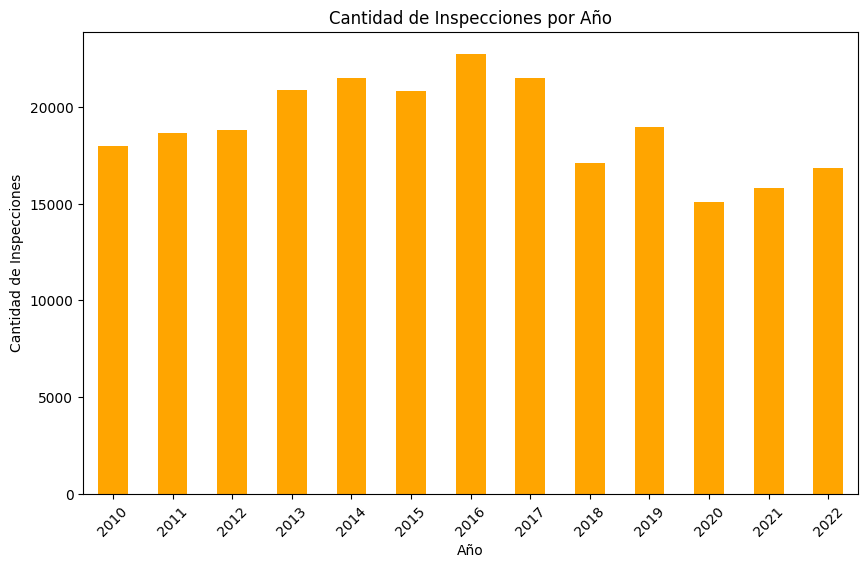

In [5]:
df['year'] = df['inspection_date'].dt.year
inspecciones_por_ano = df['year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
inspecciones_por_ano.plot(kind='bar', color='orange')
plt.title('Cantidad de Inspecciones por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Inspecciones')
plt.xticks(rotation=45)
plt.show()

# 3. Las 5 inspecciones que más se realizan


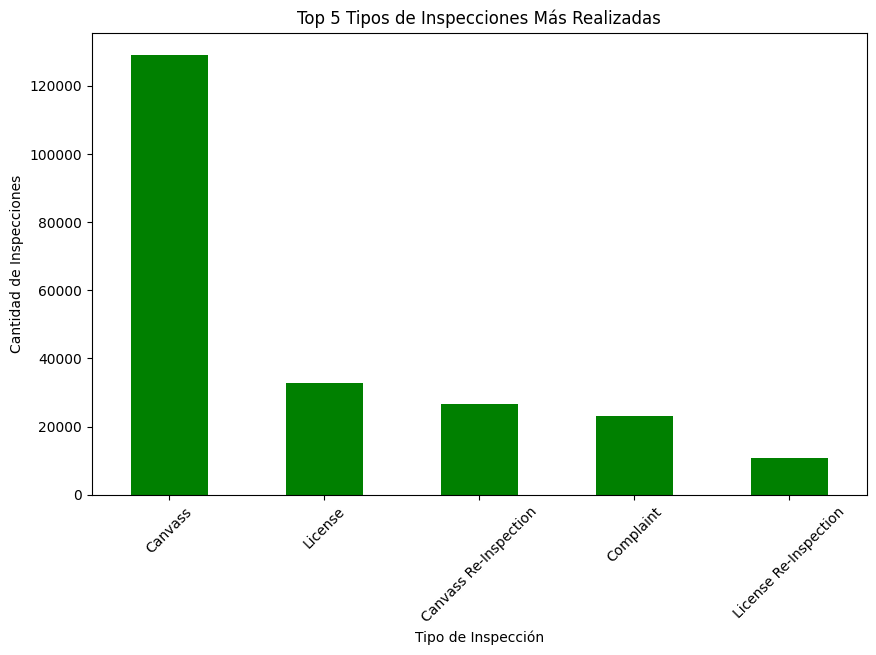

In [7]:
top_inspecciones = df['inspection_type'].value_counts().head(5)
plt.figure(figsize=(10, 6))
top_inspecciones.plot(kind='bar', color='green')
plt.title('Top 5 Tipos de Inspecciones Más Realizadas')
plt.xlabel('Tipo de Inspección')
plt.ylabel('Cantidad de Inspecciones')
plt.xticks(rotation=45)
plt.show()

# 4. Porcentaje de las 5 inspecciones más comunes


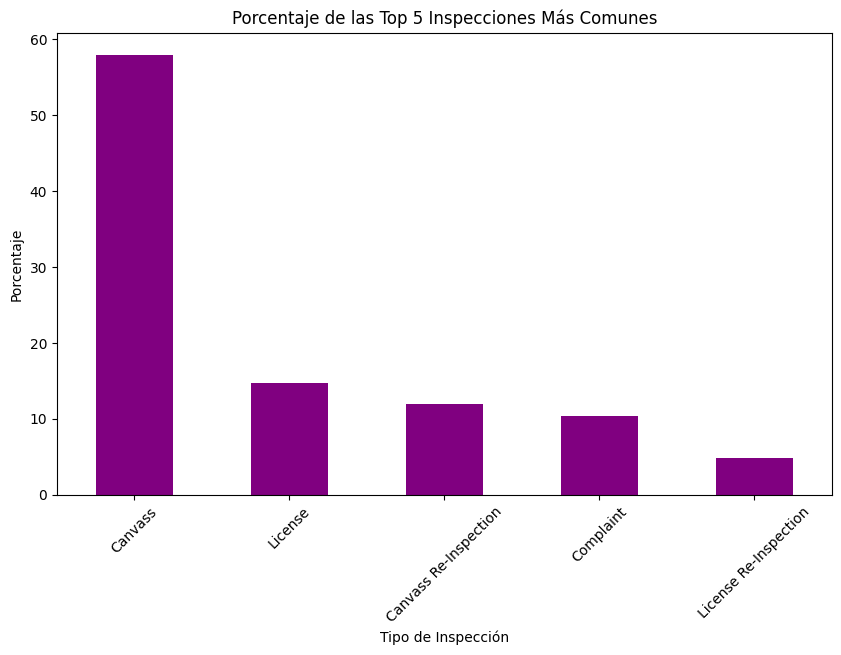

In [8]:
top_inspecciones_total = top_inspecciones.sum()
top_inspecciones_porcentaje = (top_inspecciones / top_inspecciones_total) * 100
plt.figure(figsize=(10, 6))
top_inspecciones_porcentaje.plot(kind='bar', color='purple')
plt.title('Porcentaje de las Top 5 Inspecciones Más Comunes')
plt.xlabel('Tipo de Inspección')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.show()

# 5. Porcentaje de establecimientos por tipo de resultado


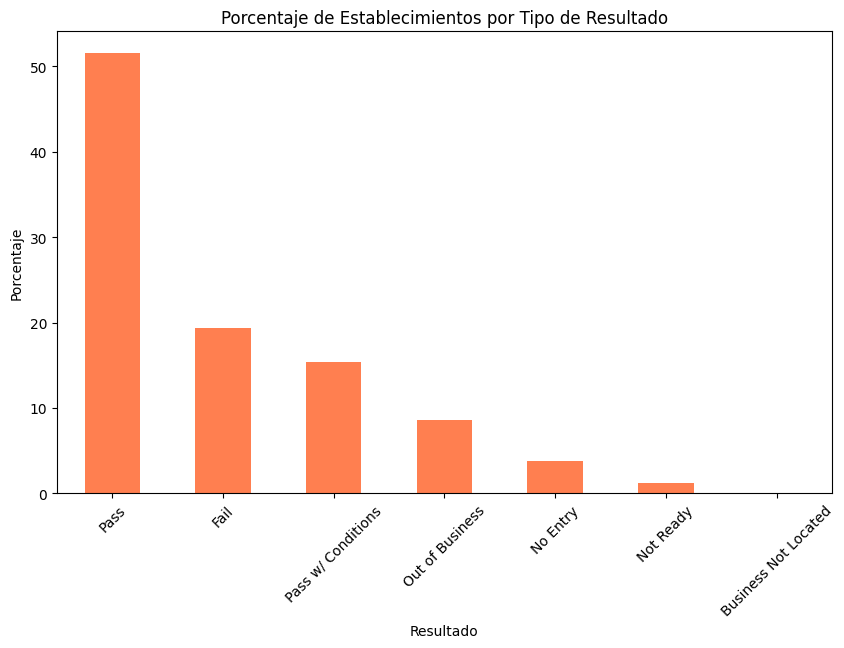

In [9]:
resultados_porcentaje = df['results'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 6))
resultados_porcentaje.plot(kind='bar', color='coral')
plt.title('Porcentaje de Establecimientos por Tipo de Resultado')
plt.xlabel('Resultado')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.show()

# 6. Mapa interactivo de inspecciones (usa tu propio Mapbox token)


In [23]:
mapbox_token = 'pk.eyJ1IjoiZGlmZXJlbmNpYWxlcyIsImEiOiJjbHlvdm9vMDAwZmNqMmlvandkejZlbGdyIn0.6e8lRuS2OVXJ-TJqA2Kv8g'  # Asegúrate de ingresar tu token de Mapbox
#df["latitude"] = df["latitude"].round(1000)
#df["longitude"] = df["longitude"].round(1000)


In [24]:
df_map = df[['latitude', 'longitude', 'results']]
df_map = df_map.dropna(subset=['latitude', 'longitude'])  # Eliminar filas sin coordenadas

# Crear el mapa
px.set_mapbox_access_token(mapbox_token)
fig = px.scatter_mapbox(
    df_map,
    lat="latitude",
    lon="longitude",
    color="results",
    color_discrete_map={"Pass": "blue", "Fail": "red"},  # Ajusta según tus valores de resultado
    zoom=10,
    title="Mapa de Inspecciones (Aprobadas vs No Aprobadas)"
)
fig.show()
fig.write_html("mapa_de_calor_compacto.html", include_plotlyjs="cdn")


